In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import calibration_curve

nltk.download('wordnet')  
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/yben409/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yben409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
model4 = pickle.load(open('models/split 4/rf_classifier_4.pkl', 'rb'))

In [3]:
dataset = pd.read_csv('Data/splits/test_split.csv')

<AxesSubplot:>

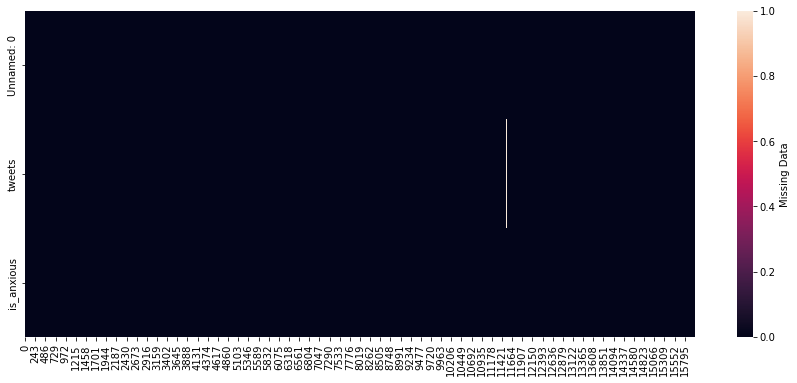

In [4]:
plt.figure(figsize=(15,6))
sns.heatmap(dataset.isnull().transpose(),cbar_kws={'label': 'Missing Data'})
#No missing values visible, Good data !

In [5]:
len(dataset[dataset['tweets'].isnull()].index)

27

In [6]:
dataset.dropna(inplace=True)

In [7]:
len(dataset[dataset['tweets'].isnull()].index)

0

In [8]:
X = dataset['tweets']
y = dataset['is_anxious']

In [9]:
best_tfidf_vectorizer = pickle.load(open('models/grid_search_50000_tfidf.pkl', 'rb'))

In [10]:
X_tfidf = best_tfidf_vectorizer.transform(X)
X_dense = X_tfidf.toarray()

In [11]:
y_pred = model4.predict(X_dense) #Model with best accuracies

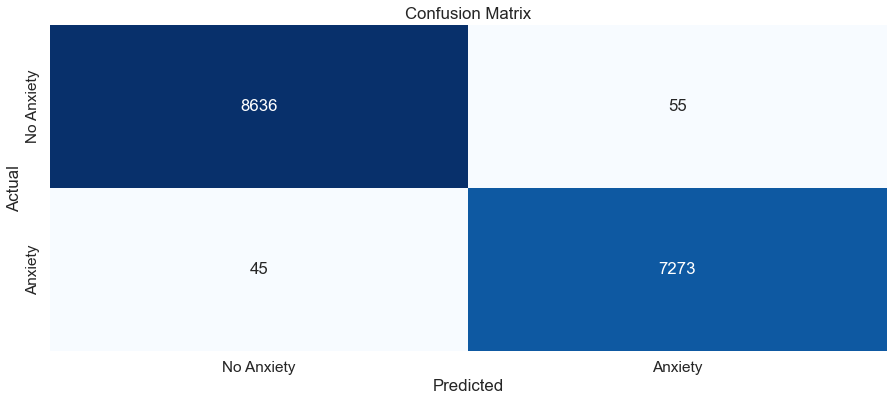

In [12]:
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15, 6))
sns.set(font_scale=1.4)  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Anxiety', 'Anxiety'],
            yticklabels=['No Anxiety', 'Anxiety'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [13]:
#[[True Positives, False Negatives],
#[False Positives, True Negatives]]

#True Positives (TP): 8636
#False Negatives (FN): 55
#False Positives (FP): 45
#True Negatives (TN): 7273

In [15]:
y_test = y

In [16]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (16009,)
Shape of y_pred: (16009,)


In [17]:
y_test = pd.DataFrame(np.array(y_test).reshape(1,-1))
y_pred = pd.DataFrame(np.array(y_pred).reshape(1,-1))

In [18]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (1, 16009)
Shape of y_pred: (1, 16009)


/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

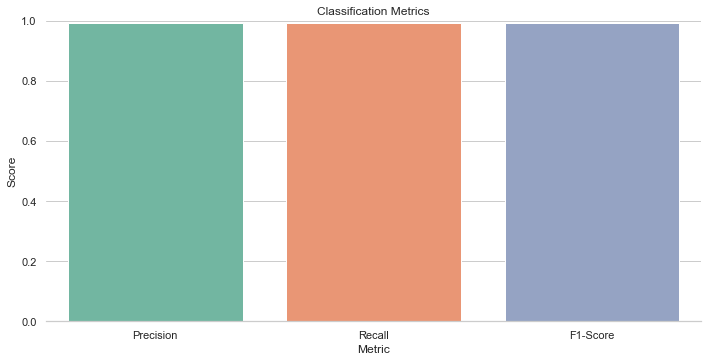

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score': [precision, recall, f1]
})

sns.set(style="whitegrid")

g = sns.catplot(x='Metric', y='Score', data=metrics_df, kind='bar', palette='Set2', height=5, aspect=2)

g.despine(left=True)
g.set_ylabels('Score')
g.set(ylim=(0, 1.0)) 
plt.title('Classification Metrics')

plt.show()
